# PROJECT 1

Submitted To: `Dr. Hasan Sajid`                                              

Submitted By: `Usman Zaheer`, Registration Number: `327700`, RIME: `2020`  Subject: `Deep Learning`

## Annex C
### Prediction Function for CNN

### Importing useful Libraries

In [22]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

### Loading the trained parameters and reshaping them as per model.

In this model, there are 08 parameters:

* 1) f1- filters of first layer (10 filters) 
* 2) f2- filters of 2nd layer   (10 filters) 
* 3) w3- weight matrix in fc layer
* 4) w4- weight matrix in fc layer
* 5) b1- bias terms for first convolution
* 6) b2- bias terms for first convolution
* 7) b3- bias for first hidden layer
* 8) b4- bias for 2nd hidden layer


In [24]:
f1 = np.loadtxt("filter1.txt").reshape(10, 1,5,5)
f2 = np.loadtxt("filter2.txt").reshape(10, 10,5,5)
w3 = np.loadtxt("weight3.txt").reshape(96,4410)
w4 = np.loadtxt("weight4.txt").reshape(8,96)
b1 = np.loadtxt("bias1.txt").reshape(10, 1)
b2 = np.loadtxt("bias2.txt").reshape(10, 1)
b3 = np.loadtxt("bias3.txt").reshape(96,1)
b4 = np.loadtxt("bias4.txt").reshape(8,1)

### Checking shapes of parameters

In [25]:
print("f1=", f1.shape) 
print("f2=", f2.shape) 
print("w3=", w3.shape)
print("w4=", w4.shape)
print("b1=", b1.shape)
print("b2=", b2.shape)
print("b3=", b3.shape)
print("b4=", b4.shape)

f1= (10, 1, 5, 5)
f2= (10, 10, 5, 5)
w3= (96, 4410)
w4= (8, 96)
b1= (10, 1)
b2= (10, 1)
b3= (96, 1)
b4= (8, 1)


#### Creating a list of paramters

In [26]:
parameters= [f1, f2, w3, w4, b1, b2, b3, b4]

### Prediction Function

In [27]:
def Prediction_Function(image, label, parameters, conv_stride, pool_filter, pool_stride):
    first_convolution = scratch_convolution(image, f1, b1, conv_stride) 
    first_convolution[first_convolution<=0] = 0 
    pooled1 = scratch_maxpool(first_convolution, pool_filter, pool_stride)
    second_convolution = scratch_convolution(first_convolution, f2, b2, conv_stride) 
    second_convolution[second_convolution<=0] = 0 
    pooled2 = scratch_maxpool(second_convolution, pool_filter, pool_stride) 
    (nf2, dim2, _) = pooled2.shape
    fully_connected = pooled2.reshape((nf2 * dim2 * dim2, 1)) 
    z = w3.dot(fully_connected) + b3
    z[z<=0] = 0 
    output = w4.dot(z) + b4 
    probs = scratch_softmax(output) 
    loss = scratch_CrossEntropyLoss(probs, label) 
    return probs, np.argmax(probs), loss

### Defining functions needed for CNN prediction function.

In [28]:
def scratch_convolution(image, filter, bias, stride=1):
    (no_of_filters, number_of_channels_f, f, _) = filter.shape 
    number_of_channels, image_dim, _ = image.shape 
    out_dim = int((image_dim - f)/stride)+1 
    assert number_of_channels == number_of_channels_f 
    convolved = np.zeros((no_of_filters,out_dim,out_dim)) 
    #moving window over image
    for curr_filter in range(no_of_filters):
        curr_y = out_y = 0
        while curr_y + f <= image_dim:
            curr_x = out_x = 0
            while curr_x + f <= image_dim:
                convolved[curr_filter, out_y, out_x] = np.sum(filter[curr_filter] * image[:,curr_y:curr_y+f, curr_x:curr_x+f]) + bias[curr_filter]
                curr_x += stride
                out_x += 1
            curr_y += stride
            out_y += 1
    return convolved

In [29]:
def scratch_maxpool(image, filter=2, stride=2):
    number_of_channels, h_prev, w_prev = image.shape
    height = int((h_prev - filter)/stride)+1 
    width = int((w_prev - filter)/stride)+1
    downsampled = np.zeros((number_of_channels, height, width)) 
    #moving window over image
    for i in range(number_of_channels):
        curr_y = out_y = 0
        while curr_y + filter <= h_prev:
            curr_x = out_x = 0
            while curr_x + filter <= w_prev:
                downsampled[i, out_y, out_x] = np.max(image[i, curr_y:curr_y+filter, curr_x:curr_x+filter])
                curr_x += stride
                out_x += 1
            curr_y += stride
            out_y += 1       
    return downsampled

In [30]:
def scratch_softmax(scores):  
    out = np.exp(scores)
    return out/np.sum(out)
def scratch_CrossEntropyLoss(probs, label):
    return -np.sum(label * np.log(probs)) 

### Loading a test image from given dataset

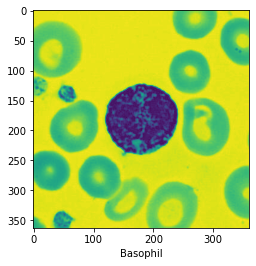

In [31]:
image= cv.imread("BA_47.jpg",0)
plt.imshow(image)
plt.xlabel("Basophil")
image= cv.resize(image,(50,50),interpolation = cv.INTER_AREA)
image=np.reshape(image, (1,50,50))

##### Finding loss and probability using trained parameters

In [53]:
Probabilities,Label,Loss = Prediction_Function(image, label=6, parameters = parameters, conv_stride=1, pool_filter=2, pool_stride=2)

In [54]:
print("Probabilities:",Probabilities)
print("Predicted Label:",Label)
print("Loss:",Loss)

Probabilities: [[9.61201676e-07]
 [8.20710788e-07]
 [8.76255410e-08]
 [9.15658616e-07]
 [1.20106748e-07]
 [5.91051855e-07]
 [9.36971976e-01]
 [6.30245274e-02]]
Predicted Label: 6
Loss: 546.7654344830379
